# seaborn主题风格

seaborn有五种主题风格：

- darkgrid（灰色网格）
- whitegrid（白色网格）
- dark（黑色）
- white（白色）
- ticks（十字叉）

In [2]:
import seaborn as sns

首先看一下 matplotlib 在默认情况下的图

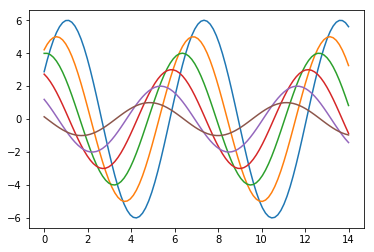

In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sinplot(flip=1):
    #在区间0-14中找出100个点
    x = np.linspace(0, 14, 100)
    #画出6条不同的sin曲线
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
sinplot()

转换为seaborn模式画图，只需要引入seaborn模块，因为之前已经引入所以会看到看到两个图是一样的， seaborn默认的是浅灰色北京和白色网格线。

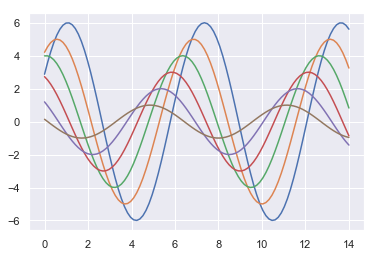

In [4]:
sns.set()
sinplot()

下面我们来看一下它的五种主题风格：

## 灰色网格（darkgrid

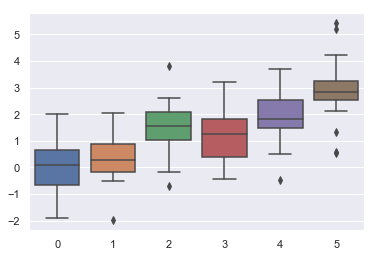

In [5]:
sns.set_style("darkgrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data)

## 白色网格（whitegrid）

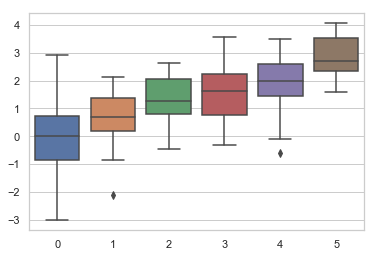

In [6]:
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data)

## 黑色（dark）

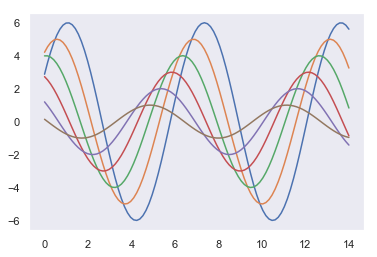

In [56]:
sns.set_style("dark")
sinplot()

## 白色（white）

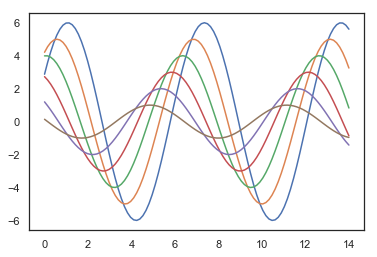

In [57]:
sns.set_style("white")
sinplot()

## 十字叉（ticks）

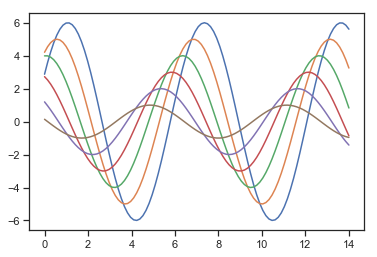

In [7]:
sns.set_style("ticks") # 坐标刻度上多个一条小小的短线
sinplot()

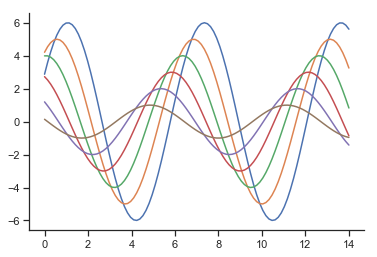

In [8]:
sinplot()
# 去掉多余的线
sns.despine()

## seaborn配色控制

颜色在可视化中非常重要，用来代表各种特征，并且提高整个图的观赏性。在seaborn中颜色主要分为连续渐变性和离散分类性。

配色板主要用color_palette()函数。

- color_palette()能传入任何Matplotlib所支持的颜色
- color_palette()不写参数则默认颜色
- set_palette()设置所有图的颜色

**分类色板**

10个默认的颜色循环主题： deep, muted, pastel, bright, dark, colorblind

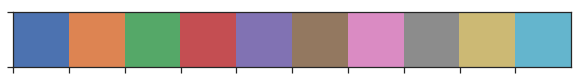

In [60]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

**圆形画板**

当你有10个以上的分类要区分时，最简单的方法就是在一个圆形的颜色空间中画出均匀间隔的颜色(这样的色调会保持亮度和饱和度不变)。这是大多数的当他们需要使用比当前默认颜色循环中设置的颜色更多时的默认方案。

最常用的方法是使用hls的颜色空间，这是RGB值的一个简单转换。

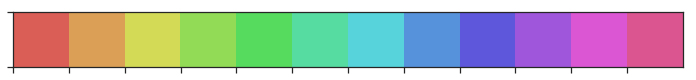

In [61]:
sns.palplot(sns.color_palette("hls", 12))

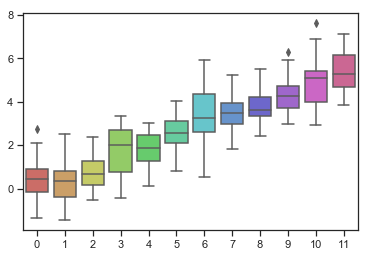

In [62]:
data = np.random.normal(size=(20, 12)) + np.arange(12) / 2
sns.boxplot(data=data,palette=sns.color_palette("hls", 12))

hls_palette()函数来控制颜色的亮度和饱和度

- l-亮度 lightness
- s-饱和 saturation

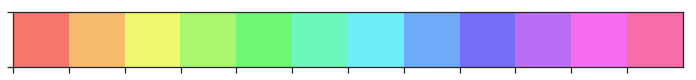

In [63]:
sns.palplot(sns.hls_palette(12, l=.7, s=.9))

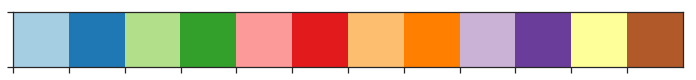

In [64]:
##让颜色成对出现，例如浅蓝深蓝，浅绿深绿
sns.palplot(sns.color_palette("Paired",12))

**使用xkcd颜色来命名颜色**

xkcd包含了一套众包努力的针对随机RGB色的命名。产生了954个可以随时通过xdcd_rgb字典中调用的命名颜色。

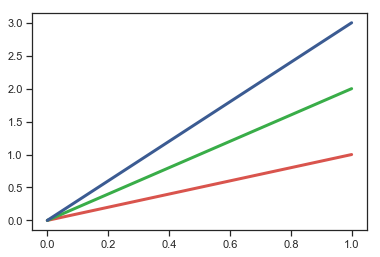

In [65]:
plt.plot([0, 1], [0, 1], sns.xkcd_rgb["pale red"], lw=3)
plt.plot([0, 1], [0, 2], sns.xkcd_rgb["medium green"], lw=3)
plt.plot([0, 1], [0, 3], sns.xkcd_rgb["denim blue"], lw=3)

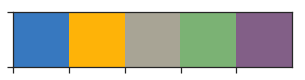

In [66]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))

**连续色板**

色彩随数据变换，比如数据越来越重要则颜色越来越深

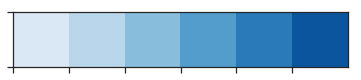

In [67]:
sns.palplot(sns.color_palette("Blues"))

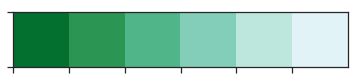

In [68]:
#如果想要翻转渐变，可以在面板名称中添加一个_r后缀
sns.palplot(sns.color_palette("BuGn_r"))

**light_palette() 和dark_palette()调用定制连续调色板**

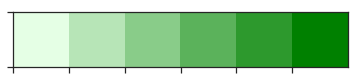

In [69]:
sns.palplot(sns.light_palette("green"))

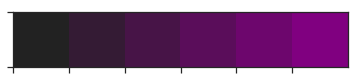

In [70]:
sns.palplot(sns.dark_palette("purple"))

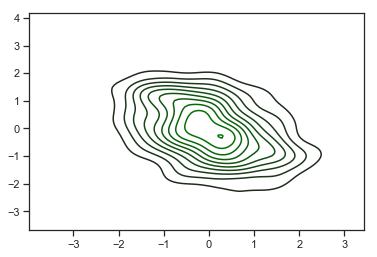

In [71]:
x, y = np.random.multivariate_normal([0, 0], [[1, -.5], [-.5, 1]], size=300).T
pal = sns.dark_palette("green", as_cmap=True)
sns.kdeplot(x, y, cmap=pal);

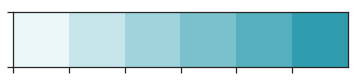

In [72]:
sns.palplot(sns.light_palette((210, 90, 60), input="husl"))

使用Seaborn绘制直方图、条图、折线图、箱图、散点图的方式有很多，本讲全部使用`replot`函数实现

## Seaborn 中的直方图绘制 

直方图(Histogram)，又称质量分布图，是一种统计报告图，由一系列高度不等的纵向条纹或线段表示数据分布的情况。 一般用横轴表示数据类型，纵轴表示分布情况。

Seaborn中使用`distplot()`绘制直方图

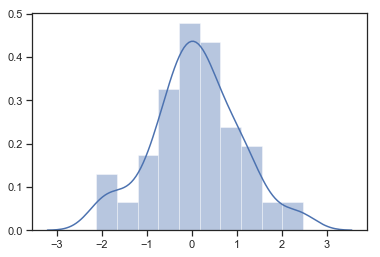

In [87]:
rs = np.random.RandomState(10)
d = rs.normal(size=100)
sns.distplot(d, kde=True, color='b')

In [103]:
help(sns.distplot)

Help on function distplot in module seaborn.distributions:

distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
    Flexibly plot a univariate distribution of observations.
    
    This function combines the matplotlib ``hist`` function (with automatic
    calculation of a good default bin size) with the seaborn :func:`kdeplot`
    and :func:`rugplot` functions. It can also fit ``scipy.stats``
    distributions and plot the estimated PDF over the data.
    
    Parameters
    ----------
    
    a : Series, 1d-array, or list.
        Observed data. If this is a Series object with a ``name`` attribute,
        the name will be used to label the data axis.
    bins : argument for matplotlib hist(), or None, optional
        Specification of hist bins, or None to use Freedman-Diaconis rule.
    hist : bool, optional
        Whether to plot 

**参数介绍**

```python
distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
```

- a: 输入数据
- hist：是否绘制（标准化）直方图。
- kde：是否绘制高斯核密度估计。
- color：拟合曲线颜色控制
- label：图例说明

## Seaborn 中的条图绘制 

条形图是用宽度相同的条形的高度或长短来表示数据多少的图形。条形图可以横置或纵置，纵置时也称为柱形图（column chart）

对因子变量计数，Seaborn使用`countplot()`绘制条形图

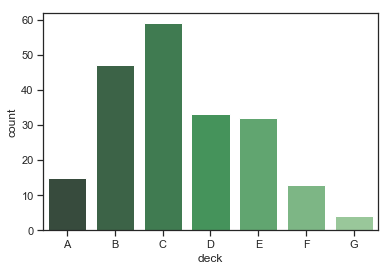

In [94]:
titanic = sns.load_dataset("titanic")
sns.countplot(x="deck",data=titanic, palette="Greens_d")

In [104]:
help(sns.countplot)

Help on function countplot in module seaborn.categorical:

countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)
    Show the counts of observations in each categorical bin using bars.
    
    A count plot can be thought of as a histogram across a categorical, instead
    of quantitative, variable. The basic API and options are identical to those
    for :func:`barplot`, so you can compare counts across nested variables.
    
    
    Input data can be passed in a variety of formats, including:
    
    - Vectors of data represented as lists, numpy arrays, or pandas Series
      objects passed directly to the ``x``, ``y``, and/or ``hue`` parameters.
    - A "long-form" DataFrame, in which case the ``x``, ``y``, and ``hue``
      variables will determine how the data are plotted.
    - A "wide-form" DataFrame, such that each numeric column will be plotted.
    - An array or list 

**参数介绍**

```python
countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)
```

- x,y: 数据的变量名称
- hue: 变量名称用于分类
- data: 输入数据的名称
- color: 所有元素的颜色，或渐变调色板的种子。
- palette: 调色板设置

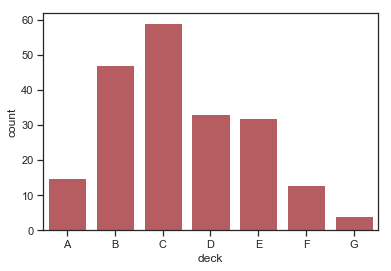

In [108]:
sns.countplot(x="deck",data=titanic, color='r')

## Seaborn 中的折线图绘制 

折线图是排列在工作表的列或行中的数据可以绘制到折线图中。折线图可以显示随时间（根据常用比例设置）而变化的连续数据，因此非常适用于显示在相等时间间隔下数据的趋势。

Seaborn使用`pointplot()`绘制折线图

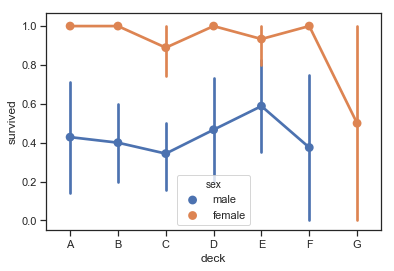

In [101]:
# hue参数添加一个分类变量
sns.pointplot(x="deck", y="survived", hue="sex", data=titanic)

In [105]:
help(sns.pointplot)

Help on function pointplot in module seaborn.categorical:

pointplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x10929ebf8>, ci=95, n_boot=1000, units=None, markers='o', linestyles='-', dodge=False, join=True, scale=1, orient=None, color=None, palette=None, errwidth=None, capsize=None, ax=None, **kwargs)
    Show point estimates and confidence intervals using scatter plot glyphs.
    
    A point plot represents an estimate of central tendency for a numeric
    variable by the position of scatter plot points and provides some
    indication of the uncertainty around that estimate using error bars.
    
    Point plots can be more useful than bar plots for focusing comparisons
    between different levels of one or more categorical variables. They are
    particularly adept at showing interactions: how the relationship between
    levels of one categorical variable changes across levels of a second
    categorical variable. The lines th

**参数介绍**

```python
pointplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x10929ebf8>, ci=95, n_boot=1000, units=None, markers='o', linestyles='-', dodge=False, join=True, scale=1, orient=None, color=None, palette=None, errwidth=None, capsize=None, ax=None, **kwargs)
```
- x，y：数据的变量名称
- hue: 变量名称用于分类
- ci：允许误差范围
- data：输入数据
- capsize：设置误差棒帽条（上下两根横线）的宽度

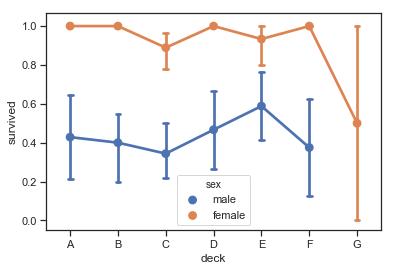

In [112]:
sns.pointplot(x="deck", y="survived", hue="sex", ci=90, data=titanic, capsize=0.1)

## Seaborn 中的箱图绘制 

箱形图（Box-plot）又称为盒须图、盒式图或箱线图，是一种用作显示一组数据分散情况资料的统计图。因形状如箱子而得名。在各种领域也经常被使用，常见于品质管理。它主要用于反映原始数据分布的特征，还可以进行多组数据分布特征的比较。

箱线图的绘制方法是：先找出一组数据的最大值、最小值、中位数和两个四分位数；然后， 连接两个四分位数画出箱子；再将最大值和最小值与箱子相连接，中位数在箱子中间。 

Seaborn使用`boxplot()`函数绘制箱图

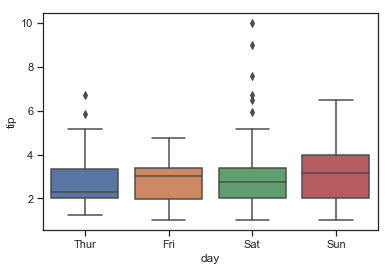

In [76]:
sns.boxplot(x="day", y="tip", data=tips)

In [106]:
help(sns.boxplot)

Help on function boxplot in module seaborn.categorical:

boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=None, **kwargs)
    Draw a box plot to show distributions with respect to categories.
    
    A box plot (or box-and-whisker plot) shows the distribution of quantitative
    data in a way that facilitates comparisons between variables or across
    levels of a categorical variable. The box shows the quartiles of the
    dataset while the whiskers extend to show the rest of the distribution,
    except for points that are determined to be "outliers" using a method
    that is a function of the inter-quartile range.
    
    
    Input data can be passed in a variety of formats, including:
    
    - Vectors of data represented as lists, numpy arrays, or pandas Series
      objects passed directly to the ``x``, ``y``, and/or ``

**参数介绍**

```python
boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=None, **kwargs)
```

- x，y：数据的变量名称
- hue: 变量名称用于分类
- order, hue_order (lists of strings)：用于控制条形图的顺序
- data：输入数据
- width：float，控制箱型图的宽度
- fliersize：float，用于指示离群值观察的标记大小
- whis：确定离群值的上下界（IQR超过低和高四分位数的比例），此范围之外的点将被识别为异常值。IQR指的是上下四分位的差值。
- capsize：设置误差棒帽条（上下两根横线）的宽度
- palette: 调色板控制

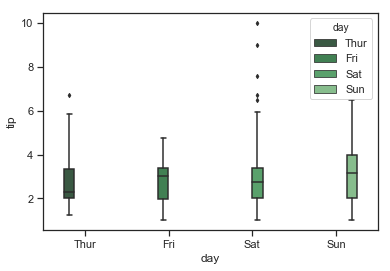

In [114]:
sns.boxplot(x="day", y="tip", hue="day", width=0.5, fliersize=3, whis=2, data=tips, palette="Greens_d")

## Seaborn 中的散点图绘制 

散点图是指在回归分析中，数据点在直角坐标系平面上的分布图，散点图表示因变量随自变量而变化的大致趋势，据此可以选择合适的函数对数据点进行拟合。

Seaborn使用`scatterplot`绘制散点图

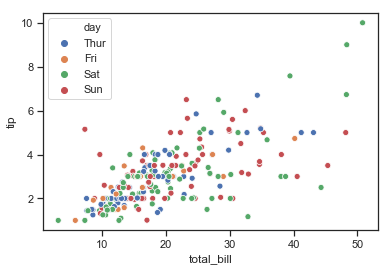

In [77]:
sns.scatterplot(x="total_bill", y="tip", hue="day", data=tips);

In [115]:
help(sns.scatterplot)

Help on function scatterplot in module seaborn.relational:

scatterplot(x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha='auto', x_jitter=None, y_jitter=None, legend='brief', ax=None, **kwargs)
    Draw a scatter plot with possibility of several semantic groupings.
    
    The relationship between ``x`` and ``y`` can be shown for different subsets
    of the data using the ``hue``, ``size``, and ``style`` parameters. These
    parameters control what visual semantics are used to identify the different
    subsets. It is possible to show up to three dimensions independently by
    using all three semantic types, but this style of plot can be hard to
    interpret and is often ineffective. Using redundant semantics (i.e. both
    ``hue`` and ``style`` for the same variable) can

**参数介绍**

```python
scatterplot(x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha='auto', x_jitter=None, y_jitter=None, legend='brief', ax=None, **kwargs)
```

- x，y：数据的变量名称
- hue: 变量名称用于分类
- order, hue_order (lists of strings)：用于控制条形图的顺序
- data：输入数据
- style： 对将产生具有不同标记的点的变量进行分组。

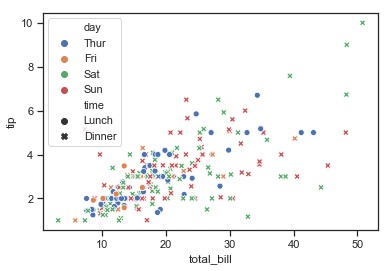

In [118]:
sns.scatterplot(x="total_bill", y="tip", hue="day", data=tips, style="time")

## Seaborn 中的 Pairplot 图绘制

`pairplot()`更广泛的视角，显示所有成对关系和边际分布，可选择以分类变量为条件：

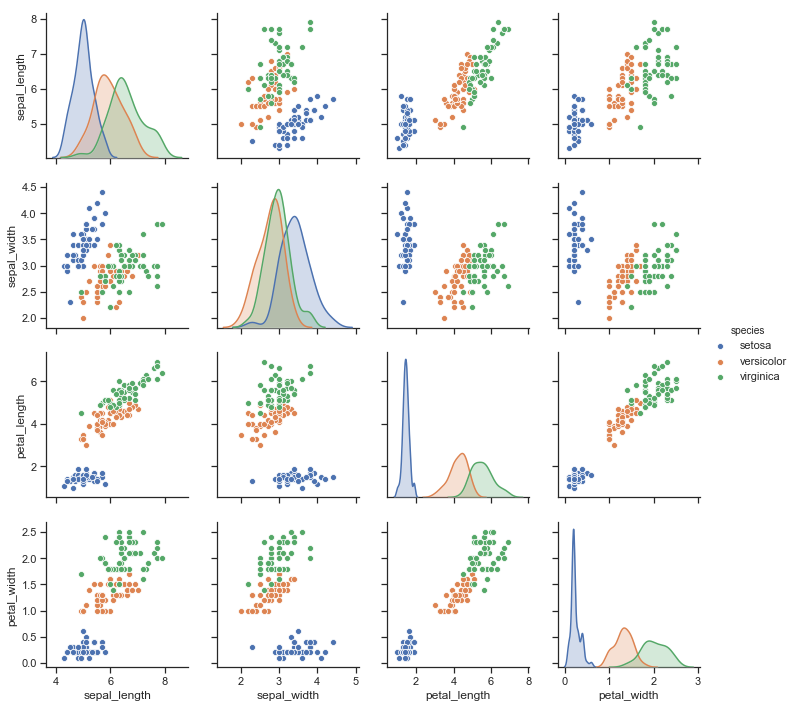

In [73]:
iris = sns.load_dataset("iris")
sns.pairplot(data=iris, hue="species")

In [119]:
help(sns.pairplot)

Help on function pairplot in module seaborn.axisgrid:

pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
    Plot pairwise relationships in a dataset.
    
    By default, this function will create a grid of Axes such that each
    variable in ``data`` will by shared in the y-axis across a single row and
    in the x-axis across a single column. The diagonal Axes are treated
    differently, drawing a plot to show the univariate distribution of the data
    for the variable in that column.
    
    It is also possible to show a subset of variables or plot different
    variables on the rows and columns.
    
    This is a high-level interface for :class:`PairGrid` that is intended to
    make it easy to draw a few common styles. You should use :class:`PairGrid`
    directly if you need more flexibility.
    

**参数介绍**

```python
pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
```

- data : 输入数据
- vars : 与data使用，否则使用data的全部变量
- {x, y}_vars : 与data使用，否则使用data的全部变量
- kind : 不同属性关系之前图的类型
- hue : 使用指定变量为分类变量画图
- hue_order : list of strings Order for the levels of the hue variable in the palette
- palette : 调色板颜色
- markers : 使用不同的形状
- dropna : 是否剔除缺失值

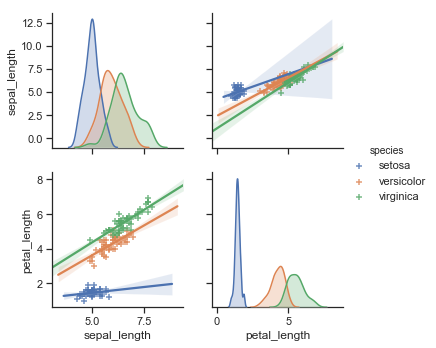

In [136]:
sns.pairplot(data=iris, hue="species", vars=["sepal_length", "petal_length"], markers="+", kind='reg')

`jointplot()`专注于单一关系：

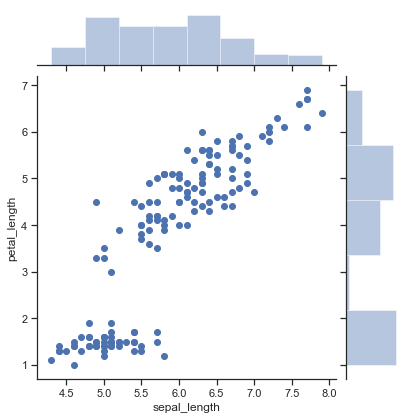

In [74]:
sns.jointplot(x="sepal_length", y="petal_length", data=iris)

In [122]:
help(sns.jointplot)

Help on function jointplot in module seaborn.axisgrid:

jointplot(x, y, data=None, kind='scatter', stat_func=None, color=None, height=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)
    Draw a plot of two variables with bivariate and univariate graphs.
    
    This function provides a convenient interface to the :class:`JointGrid`
    class, with several canned plot kinds. This is intended to be a fairly
    lightweight wrapper; if you need more flexibility, you should use
    :class:`JointGrid` directly.
    
    Parameters
    ----------
    x, y : strings or vectors
        Data or names of variables in ``data``.
    data : DataFrame, optional
        DataFrame when ``x`` and ``y`` are variable names.
    kind : { "scatter" | "reg" | "resid" | "kde" | "hex" }, optional
        Kind of plot to draw.
    stat_func : callable or None, optional
        *Deprecated*
    color : matplotlib color, optional
        Colo

**参数介绍**

```python
jointplot(x, y, data=None, kind='scatter', stat_func=None, color=None, height=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)
```

- x,y ：数据的列名或者是两组数据
- data：输入数据 
- kind是你想要画图的类型，可为：scatter,reg,resid,kde,hex
- space：定义的是上，右图像距离中间图像的距离
- color：定义的是图形的整体颜色

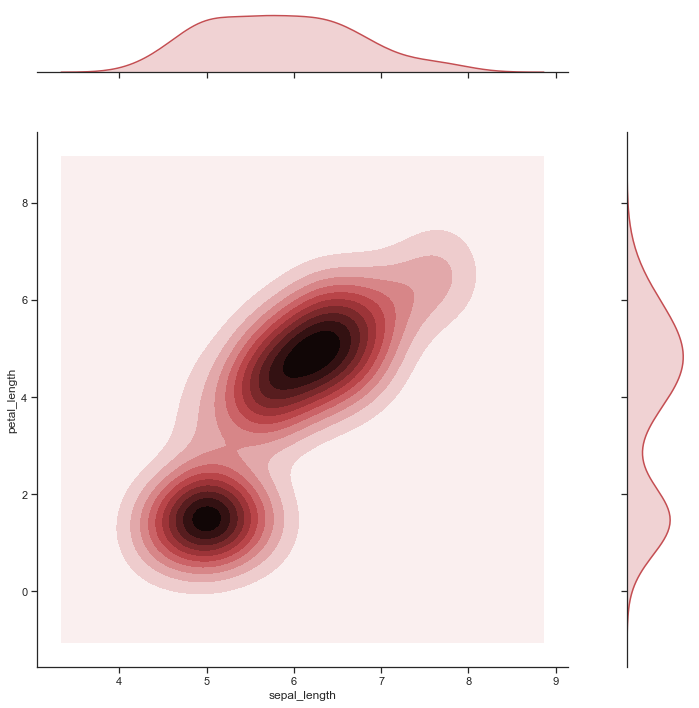

In [130]:
sns.jointplot(x="sepal_length", y="petal_length", data=iris, kind='kde', height=10, space=1, color='r')